In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('results.csv')

In [4]:
df

,Sampling Type,Coreset Size,Average Cost,Reduction in Data Size,Error,Avg Rand Index,Data,Optimal Cost,Avg Time,Num Iterations Volume Sampling,Clustering Algorithm
0,Volume Sampling,474,1.150492e+11,95.26,463.848772,0.963519,KDD,2.040426e+10,0.211612,1.0,KMeans++
1,Volume Sampling,475,1.326848e+11,95.25,550.279722,0.966513,KDD,2.040426e+10,0.221085,2.0,KMeans++
2,Volume Sampling,478,1.755777e+11,95.22,760.495267,0.953055,KDD,2.040426e+10,0.255715,5.0,KMeans++
3,Volume Sampling,926,5.792439e+10,90.74,183.883834,0.972418,KDD,2.040426e+10,0.265303,1.0,KMeans++
4,Volume Sampling,906,8.645982e+10,90.94,323.734209,0.966581,KDD,2.040426e+10,0.298187,2.0,KMeans++
...,...,...,...,...,...,...,...,...,...,...,...
286,Volume Sampling (Weighted),5063,2.203097e+06,49.37,11.603318,0.968439,Synthetic,1.974043e+06,15.019967,2.0,KMedoids
287,Volume Sampling (Weighted),5063,1.986991e+06,49.37,0.655948,0.974871,Synthetic,1.974043e+06,21.588274,5.0,KMedoids
288,Volume Sampling (Weighted),6332,2.145570e+06,36.68,8.689144,0.970572,Synthetic,1.974043e+06,11.676719,1.0,KMedoids
289,Volume Sampling (Weighted),6319,2.131789e+06,36.81,7.991050,0.970820,Synthetic,1.974043e+06,13.364722,2.0,KMedoids


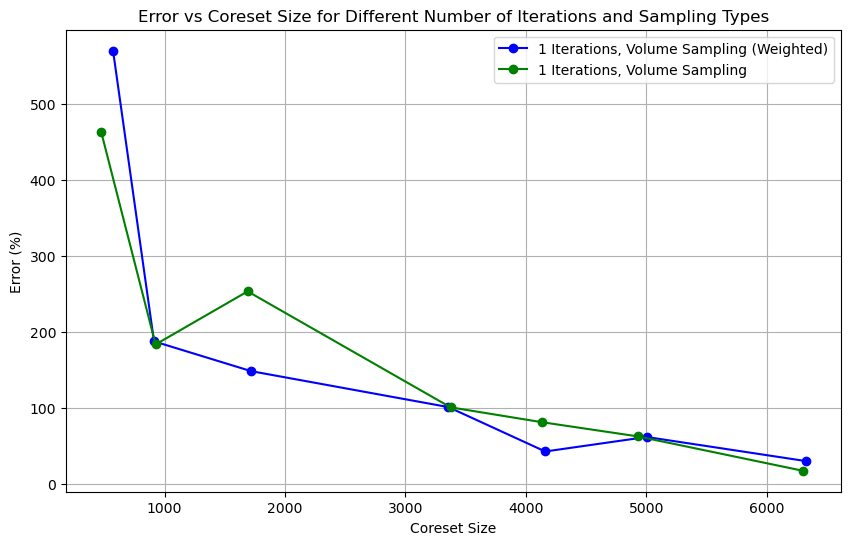

In [7]:
num_iterations_to_plot = [1, 2, 5]
colors = ['blue', 'green', 'red']
plt.figure(figsize=(10, 6))

i = 0
for sampling_type in ['Volume Sampling (Weighted)', 'Volume Sampling']:  # Update 'Other Sampling Type' accordingly
    filtered_data = df[(df['Num Iterations Volume Sampling'] == 1) & (df['Sampling Type'] == sampling_type) & (df['Data'] == 'KDD')]
    plt.plot(filtered_data['Coreset Size'], filtered_data['Error'], marker='o', linestyle='-', color=colors[i], label=f'{1} Iterations, {sampling_type}')
    i+=1

plt.title('Error vs Coreset Size for Different Number of Iterations and Sampling Types')
plt.xlabel('Coreset Size')
plt.ylabel('Error (%)')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
df[df.isna()]

,Sampling Type,Coreset Size,Average Cost,Reduction in Data Size,Error,Avg Rand Index,Data,Optimal Cost,Avg Time,Num Iterations Volume Sampling
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


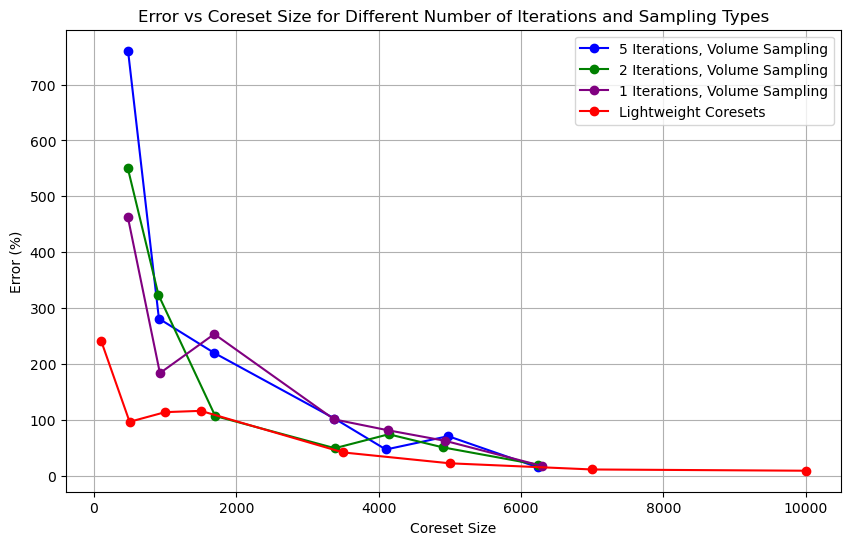

In [18]:
num_iterations_to_plot = [1, 2, 5]
colors = ['blue', 'green', 'red']
plt.figure(figsize=(10, 6))

filtered_data = df[(df['Num Iterations Volume Sampling'] == 5) & (df['Sampling Type'] == 'Volume Sampling') & (df['Data'] == 'KDD')]
plt.plot(filtered_data['Coreset Size'], filtered_data['Error'], marker='o', linestyle='-', color='blue', label=f'{5} Iterations, {sampling_type}')
filtered_data = df[(df['Num Iterations Volume Sampling'] == 2) & (df['Sampling Type'] == 'Volume Sampling') & (df['Data'] == 'KDD')]
plt.plot(filtered_data['Coreset Size'], filtered_data['Error'], marker='o', linestyle='-', color='green', label=f'{2} Iterations, {sampling_type}')
filtered_data = df[(df['Num Iterations Volume Sampling'] == 1) & (df['Sampling Type'] == 'Volume Sampling') & (df['Data'] == 'KDD')]
plt.plot(filtered_data['Coreset Size'], filtered_data['Error'], marker='o', linestyle='-', color='purple', label=f'{1} Iterations, {sampling_type}')
filtered_data = df[(df['Sampling Type'] == 'Lightweight Coresets') & (df['Data'] == 'KDD')]
plt.plot(filtered_data['Coreset Size'], filtered_data['Error'], marker='o', linestyle='-', color='red', label=f'Lightweight Coresets')

plt.title('Error vs Coreset Size for Different Number of Iterations and Sampling Types')
plt.xlabel('Coreset Size')
plt.ylabel('Error (%)')
plt.legend()
plt.grid(True)
plt.show()


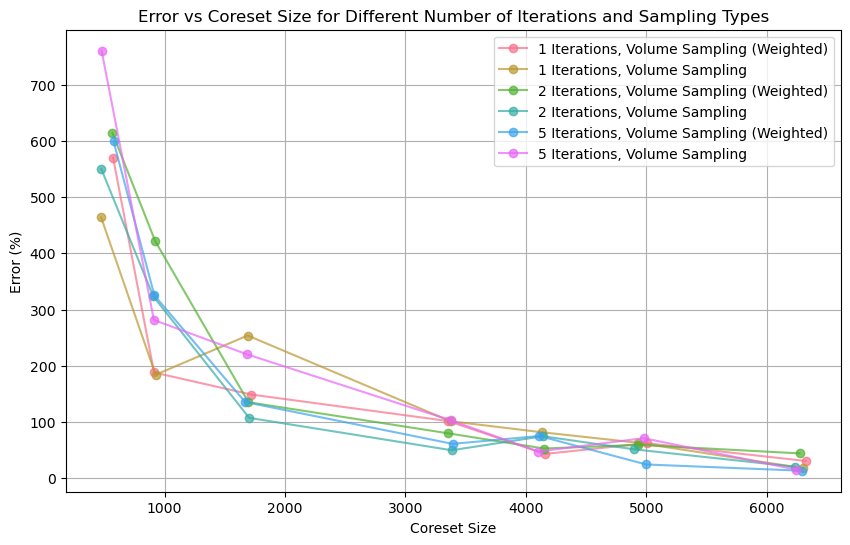

In [9]:
import seaborn as sns

# Define the number of iterations and sampling types
num_iterations_to_plot = [1, 2, 5]
sampling_types = ['Volume Sampling (Weighted)', 'Volume Sampling']  # Update with actual sampling types

# Create a color palette with enough colors to cover all combinations
palette = sns.color_palette('husl', n_colors=len(num_iterations_to_plot) * len(sampling_types))

plt.figure(figsize=(10, 6))

# Iterate over each combination of num_iterations and sampling_type
for i, num_iter in enumerate(num_iterations_to_plot):
    for j, sampling_type in enumerate(sampling_types):
        filtered_data = df[(df['Num Iterations Volume Sampling'] == num_iter) & (df['Sampling Type'] == sampling_type) & (df['Data'] == 'KDD')]
        # Use the corresponding color from the palette
        color = palette[i * len(sampling_types) + j]
        plt.plot(filtered_data['Coreset Size'], filtered_data['Error'], marker='o', linestyle='-', color=color, label=f'{num_iter} Iterations, {sampling_type}', alpha=0.7)

plt.title('Error vs Coreset Size for Different Number of Iterations and Sampling Types')
plt.xlabel('Coreset Size')
plt.ylabel('Error (%)')
plt.legend()
plt.grid(True)
plt.show()
